In [49]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 725kB/s ta 0:00:01
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /Users/dahlmoon/Library/Caches/pip/wheels/79/8b/2b/17dcfb9c9b044b216a58daea9787a0637cb1ffc5b4c2a78e50
Successfully built mglearn


In [1]:
import numpy as np

In [2]:
x = np.array([[1,2,3],[4,5,6]])
print("x : \n{}".format(x))

x : 
[[1 2 3]
 [4 5 6]]


In [4]:
from scipy import sparse

eye = np.eye(4)

print(" array eye \n {}".format(eye))

 array eye 
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [5]:
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
one = np.ones(4)
print(one)

[ 1.  1.  1.  1.]


In [7]:
row_indices = np.arange(4)
col_indices = np.arange(4)

eye_coo = sparse.coo_matrix((one,(row_indices,col_indices)))
print(eye_coo)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [13]:
from sklearn.datasets import load_iris

In [14]:
iris_dataset = load_iris()

## Bunch 클래스는 사전처럼 처리됨 

In [15]:
print(type(iris_dataset))

<class 'sklearn.datasets.base.Bunch'>


In [16]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

## 데이터에 들어간 것을 조회

In [18]:
iris_dataset['data'].shape

(150, 4)

In [27]:
iris_dataset['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

## target 

    0 : setosa
    1 : versicolor
    2 : vrginica

In [21]:
iris_dataset['target'].shape

(150,)

In [26]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [24]:
iris_dataset['DESCR'][:100]

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Inst'

## 꽃받침sepal, 꽃잎 petal로 정의 

In [25]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 훈련과 테스트 데이터의 분리

In [28]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [35]:
print(X_train.shape, y_train.shape)

(112, 4) (112,)


In [36]:
print(X_test.shape, y_test.shape)

(38, 4) (38,)


## 산점도 행렬로 변경

In [37]:
import pandas as pd

In [41]:
%matplotlib inline

In [43]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [45]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e368ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ea6da90>]], dtype=object)

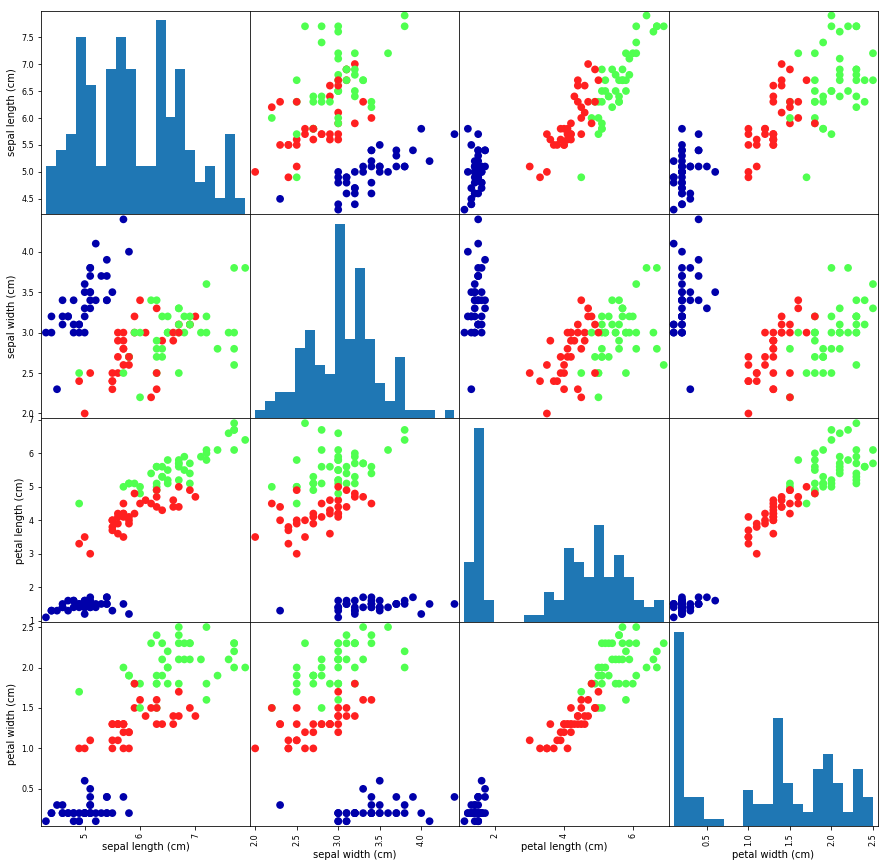

In [50]:
import mglearn 
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', 
                           hist_kwds={'bins' : 20}, s=60,alpha = 8, cmap=mglearn.cm3)

## k - 최근접 이웃 알고리즘 처리해보기

In [46]:
from sklearn.neighbors import KNeighborsClassifier


In [47]:
knn = KNeighborsClassifier(n_neighbors=1)

## 모델 만들기

    훈련데이터 : X_train
    레이블 : y_train
        

In [64]:
help(knn.fit)

Help on method fit in module sklearn.neighbors.base:

fit(X, y) method of sklearn.neighbors.classification.KNeighborsClassifier instance
    Fit the model using X as training data and y as target values
    
    Parameters
    ----------
    X : {array-like, sparse matrix, BallTree, KDTree}
        Training data. If array or matrix, shape [n_samples, n_features],
        or [n_samples, n_samples] if metric='precomputed'.
    
    y : {array-like, sparse matrix}
        Target values of shape = [n_samples] or [n_samples, n_outputs]



In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## 하나의 데이터를 넣어 예측해보기

In [52]:
X_new = np.array([[5,2.9,1,0.2]])

print(X_new)
print(X_new.shape)

[[ 5.   2.9  1.   0.2]]
(1, 4)


In [54]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


## 테스트한 결과 검증 

In [55]:
y_pred = knn.predict(X_test)

In [56]:
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [58]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [59]:
print(y_pred == y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]


In [62]:
a = y_pred == y_test

print(len(a))

count = 0
for i in a :
    if i == True :
        count += 1
        
print(count)
print(count / len(a))

38
37
0.9736842105263158


In [57]:
np.mean(y_pred == y_test)

0.97368421052631582

In [63]:
knn.score(X_test, y_test)

0.97368421052631582